In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [11]:
summa = xr.open_dataset('template_output_harts_SNTL_WY23_timestep.nc')
summa = summa.to_dataframe().reset_index()
summa['time'] = pd.to_datetime(summa['time'])
summa.set_index('time', inplace=True)

obs = pd.read_csv('../processing/methow/harts_met_WY23.csv')

# obs = obs[obs['Date_Time'] > '2023-10-17'] 

obs.rename(columns={'Date_Time':'time', 'AirTC_Avg':'airtemp', 'RH':'rh', 'WS_ms_S_WVT':'windspd', 
                    'WindDir_D1_WVT':'winddir', 'snow_water_equiv_set_1':'swe', 'snow_depth_set_1':'snowdepth'}, inplace=True)
obs['time'] = pd.to_datetime(obs['time'])
# obs['time'] = obs['time'].dt.strftime('%Y-%m-%d %H:%M:%S')

obs.set_index('time', inplace=True)


In [12]:
obs

,air_temp_set_1,wind_speed_set_1,snowdepth,solar_radiation_set_1,precip_accum_set_1,swe
time,,,,,,
2022-10-01 00:00:00+00:00,14.0,NaN,0.0,860.28,1379.22,NaN
2022-10-01 01:00:00+00:00,12.6,NaN,0.0,623.04,1379.22,NaN
2022-10-01 02:00:00+00:00,10.5,NaN,0.0,517.56,1379.22,NaN
2022-10-01 03:00:00+00:00,9.1,0.94,0.0,107.52,1379.22,NaN
2022-10-01 04:00:00+00:00,9.1,0.00,0.0,19.32,1379.22,NaN
...,...,...,...,...,...,...
2023-09-29 20:00:00+00:00,NaN,NaN,NaN,NaN,932.18,5.08
2023-09-29 21:00:00+00:00,NaN,NaN,NaN,NaN,932.18,5.08
2023-09-29 22:00:00+00:00,NaN,NaN,NaN,NaN,929.64,5.08


In [13]:
obs.index

DatetimeIndex(['2022-10-01 00:00:00+00:00', '2022-10-01 01:00:00+00:00',
               '2022-10-01 02:00:00+00:00', '2022-10-01 03:00:00+00:00',
               '2022-10-01 04:00:00+00:00', '2022-10-01 05:00:00+00:00',
               '2022-10-01 06:00:00+00:00', '2022-10-01 07:00:00+00:00',
               '2022-10-01 08:00:00+00:00', '2022-10-01 09:00:00+00:00',
               ...
               '2023-09-29 15:00:00+00:00', '2023-09-29 16:00:00+00:00',
               '2023-09-29 17:00:00+00:00', '2023-09-29 18:00:00+00:00',
               '2023-09-29 19:00:00+00:00', '2023-09-29 20:00:00+00:00',
               '2023-09-29 21:00:00+00:00', '2023-09-29 22:00:00+00:00',
               '2023-09-29 23:00:00+00:00', '2023-09-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=8691, freq=None)

Text(0.5, 1.0, 'Harts Pass SWE WY23')

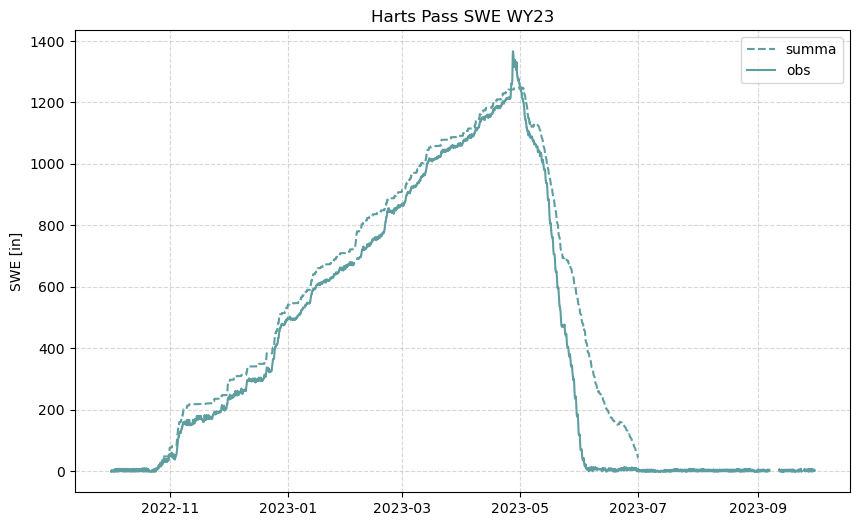

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(summa.index, summa['scalarSWE'], label='summa', color='cadetblue', ls='--')
ax.plot(obs.index, obs['swe'], label='obs', color='cadetblue')
ax.grid(ls='--', alpha=0.5)
ax.legend()
ax.set_ylabel('SWE [in]')
ax.set_title('Harts Pass SWE WY23')